<a href="https://colab.research.google.com/github/Tanishka-Rohilla/Wine-Quality-Prediction-ML/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1432,5.9,0.44,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6
957,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6
967,8.5,0.66,0.20,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2,5
377,9.4,0.27,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7
150,7.3,0.33,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6



*   The dataset conatin numerical data related to wine's chhemicalproperties.

*   Each row represents one wine sample.









##***Basic Data Inspection***

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data inspection is important because it:

*   Helps understanding data types.
*   Identifies nuerical vs categorical data.

*   Reveals scale differences between features.
*   Prevents error before model training.





In [8]:
df.isnull()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**No missing values** are presents in the dataset.

**If missing values were presents:**

*   Numerical values would be handled using mean or median imputation
*   categorical values would be filled using mode or an “Unknown” category.

*   If missing data was excessive, the column might be removed.

 Proper handling ensures data quality, improves model accuracy, and prevents bias in predictions.




##***EDA***

In [9]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


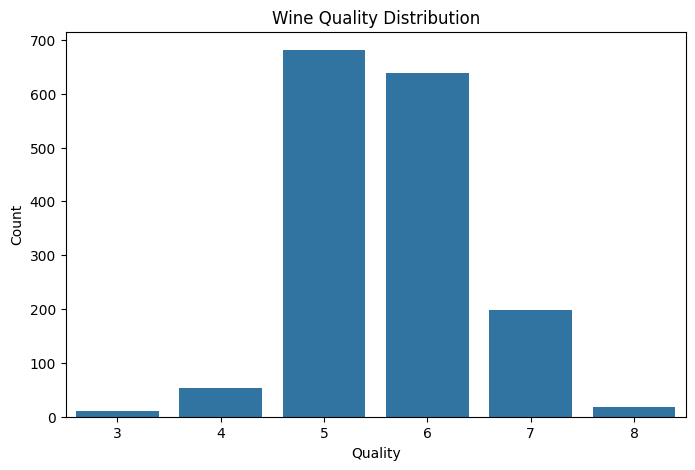

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality',data=df)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

**Obervations of Graph:**

*   Most wine have quality scores beteen 5 and 6.
*   Very few wines have extremely highb or low quality.

*   Dataset is imbalance towards average-qality wines.


**EDA** is important because:

*   Reveals class imbalance
*   Helps choose suitable ML model

*   Identifies patterns and anormalies before training









##***Convert into Binary Classification:***

In [11]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

Binary classification is more useful because:

Real-world systems often need decision-based outputs (Good / Bad)

Easier to deploy in production

Reduces prediction complexity

##***Feature and Target Separation***

In [12]:
X = df.drop(['quality','quality_label'],axis=1)
Y = df['quality_label']

The original quality column should not be used as a input feature because:

It directly determines the target

Using it causes data leakage

Leads to unrealistically high accuracy



##***Train-Test Split***

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

We split data into training and testing sets because:

Training data -- used to learn patterns

Testing data -- used to evaluate performance

**Training and testing on the same data** causes **overfitting**, where the model memorizes instead of learning.

##***Feature Scaling***

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Feature scaling is important because**:


*   Prevents large-value features from dominating
*   Improves convergence of gradient-based models


**ML models needs scaling**:


*   Logistic Regression
*   SVM

*   KNN

**ML models that does not require scaling**:

*   Decision tree
*   Random Forest



##***Model Training***

**Logistic Regression:**

In [15]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scaled,Y_train)

LogisticRegression()

***Logistic Regression***: Uses probability estimation.

**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

***KNN***: Classifies using nearest neighbors.

**SVM**

In [17]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled,Y_train)

SVC()

***SVM***: Finds optimal separating hyperplane.

**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

***Decision Tree***: Uses rule-based splitting.

**Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

***Random Forest***: Ensemble of decision trees.

##***Model Evaluation***

In [20]:
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

results = []

for name, model in models.items():
    if name in ["Decision Tree", "Random Forest"]:
        Y_pred = model.predict(X_test)
    else:
        Y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(Y_test, Y_pred)
    results.append([name, acc])

result_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(result_df)


                 Model  Accuracy
0  Logistic Regression  0.865625
1                  KNN  0.881250
2        Decision Tree  0.871875
3        Random Forest  0.900000
4                  SVM  0.875000


Best Model is **Random Forest**

Reason is:

*   Handles non-linearity

*   Reduces overfitting

*   Combines multiple trees for robust predictions







##**Pipeline & Hyperparameter Tuning**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# FOR LOGISTIC REGRESSION
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100]
}

grid_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    cv=5,
    scoring='accuracy'
)

grid_lr.fit(X_train, Y_train)

print("Best Parameters (Logistic Regression):", grid_lr.best_params_)
print("Best Cross-Validation Score:", grid_lr.best_score_)

# FOR SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(
    svm_pipeline,
    param_grid_svm,
    cv=5,
    scoring='accuracy'
)

grid_svm.fit(X_train, Y_train)

print("Best Parameters (SVM):", grid_svm.best_params_)
print("Best Cross-Validation Score:", grid_svm.best_score_)


Best Parameters (Logistic Regression): {'lr__C': 100}
Best Cross-Validation Score: 0.8858517156862746
Best Parameters (SVM): {'svm__C': 10, 'svm__kernel': 'rbf'}
Best Cross-Validation Score: 0.8944424019607844


**Pipelines** are used in real-world ML systems because:

*   Pipelines are used to automate and standardize the entire ML workflow by combining preprocessing steps (like scaling, encoding, or imputation) with the model into a single sequence.
*   prevent data leakage
*   ensure the same transformations are applied to training and new data



**Hyperparameter** tuning improves accuracy or model performance by selecting the best model settings using cross-validation.

*   reduces overfitting or underfitting
*   helps the model generalize better to unseen data, leading to higher accuracy and reliability



##**Conclusion**

This project focused on predicting wine quality using physicochemical attributes. Exploratory Data Analysis revealed that most wines are of average quality. Converting the problem into binary classification made it more practical. Among all models, **Random Forest** achieved the best performance due to its ensemble learning capability. Through this project, I learned the importance of preprocessing, feature scaling, model selection, evaluation, and tuning. This workflow closely resembles real-world Machine Learning applications used in quality control and decision-making systems.